<a href="https://colab.research.google.com/github/LemonSqu33zy/MAT421/blob/main/Module_B_17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

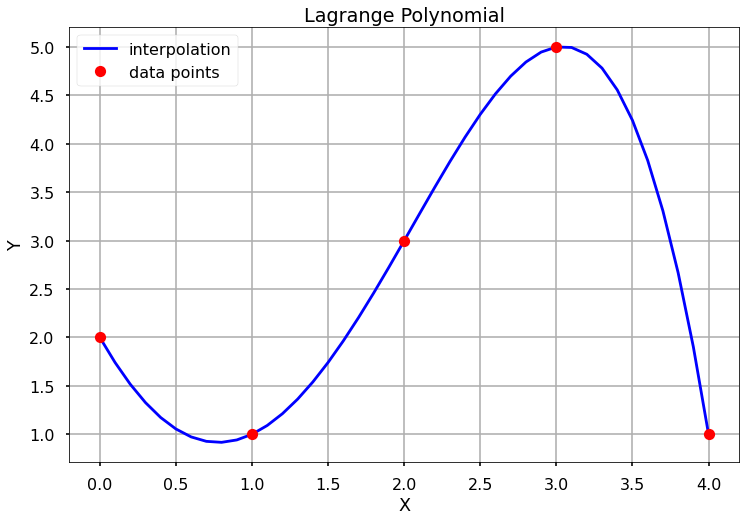

In [29]:
# Taking a random set of data and runnning a lagrange polynomial interpolation using scipy and numpy. The graph plots each data point along with the 
# interpolation line, which is found by using an "new" x array that is then run through the same lagrange function as the original data.
  
import numpy as np 
import numpy.polynomial.polynomial as poly 
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

x_step = np.arange(0, 4.1, 0.1) 
f = lagrange(x, y) 
fig = plt.figure(figsize = (12,8)) 
plt.plot(x_step, f(x_step), 'b', label = 'interpolation')
plt.plot(x, y, 'ro', label = 'data points') 
plt.title('Lagrange Polynomial') 
plt.grid() 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.legend()
plt.show() 

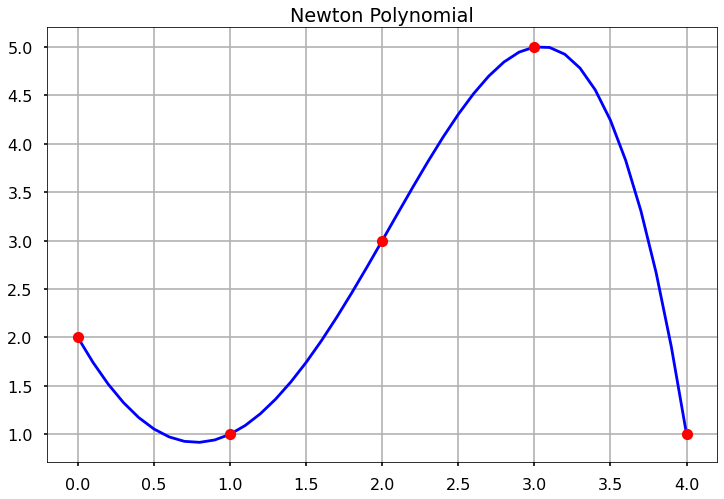

In [28]:
# this function uses the newtonian method instead of lagrange, and using the same data set, generates the same interpolation. By finding the divided 
# differences, we obtain the 'a' coefficients that are used in the function that generates our Newton Polynomial interpolation. 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(0, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Newton Polynomial') 
plt.grid() 
plt.show()